# Importing the libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings('ignore')

# importing the dataset

In [2]:
Default = pd.read_csv('Default.csv')

# Glimpse of Data
Default.head()

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50


# Let's check the no of obs and no of variables

In [3]:
print("The number of rows (observations) is", Default.shape[0], '\n' 'The number of Columns (Variables) is', Default.shape[1])

The number of rows (observations) is 10000 
The number of Columns (Variables) is 4


# Descriptive Statistics for the continuous varibles

In [4]:
Default.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374877,33516.981852
std,483.714957,13336.639582
min,0.000000,771.970000
25%,481.732500,21340.460000
50%,823.635000,34552.645000
75%,1166.305000,43807.730000
max,2654.320000,73554.230000


# Univariate Analysis - Balance and Income variables

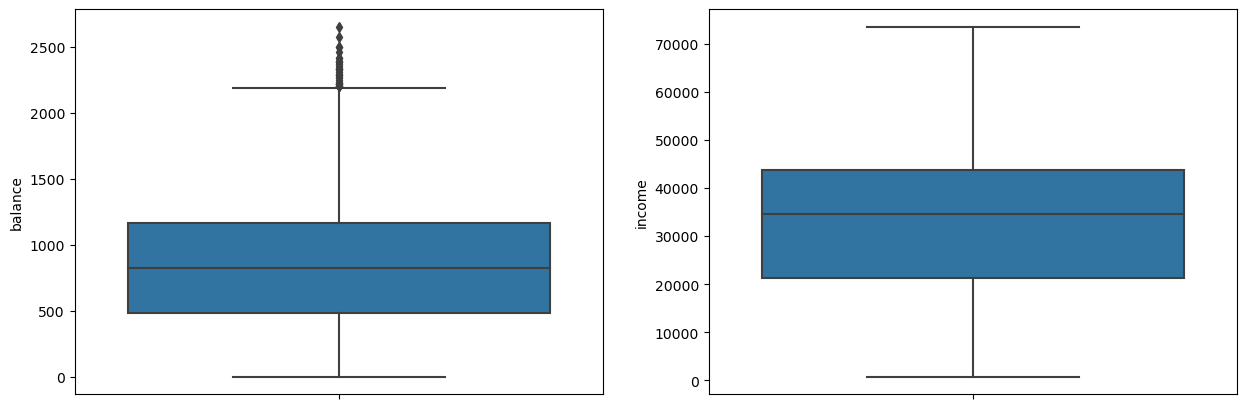

In [5]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(y =Default['balance'])

plt.subplot(1,2,2)
sns.boxplot(y = Default['income'])
plt.show()

# Univariate Analysis - Students and Default variables

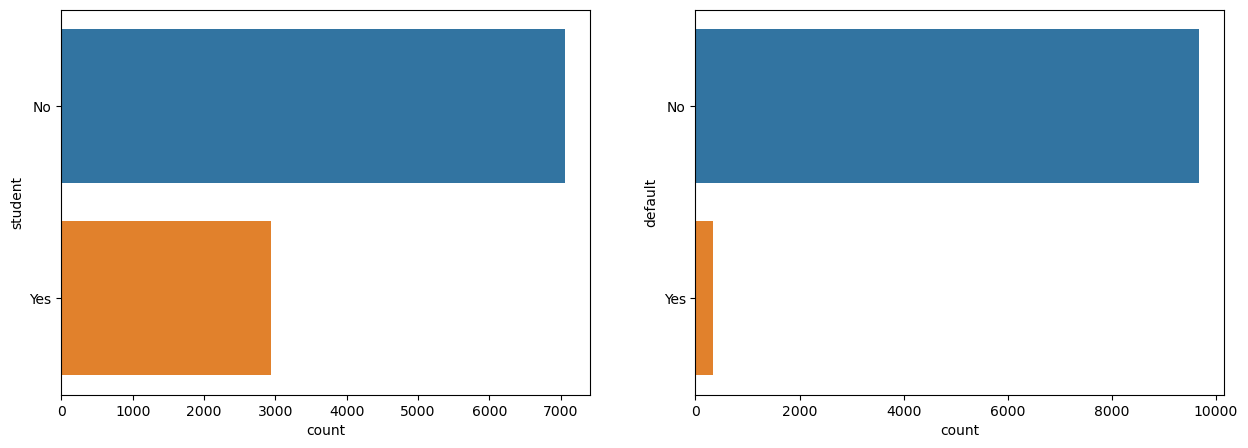

In [6]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(y =Default['student'])

plt.subplot(1,2,2)
sns.countplot(y = Default['default'])
plt.show()

#### Now, let us check the basis measures of descriptive stats for the categorical variables

In [7]:
Default['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [8]:
Default['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

#### checking proportion of default

In [9]:
Default['default'].value_counts(normalize=True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

## Data seems highly imbalanced

# Bi-variate Analysis : Default vs other variables

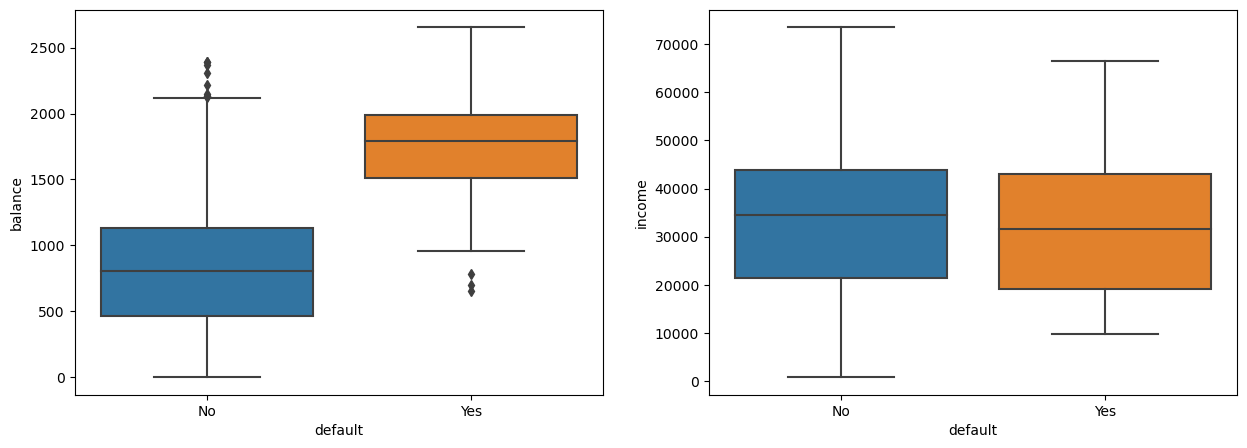

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(Default['default'], Default['balance'])

plt.subplot(1,2,2)
sns.boxplot(Default['default'], Default['income'])

plt.show()

### inference : Defaulters seems to have higher outstanding balance compared non-defaulter. Defaulters income seems lower compared to non-defaulter

In [11]:
Default.head(2)

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13


In [12]:
Default['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [13]:
pd.crosstab(Default['student'], Default['default'], normalize='index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


## Check for correlation between independent variables

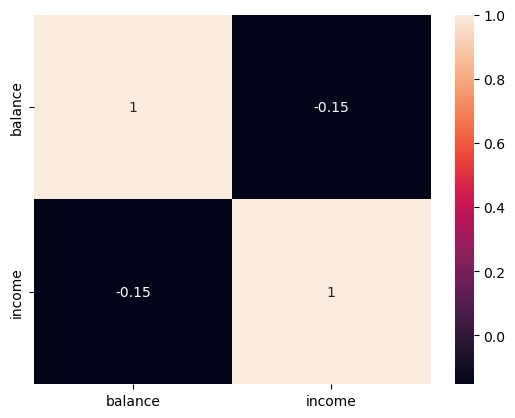

In [14]:
sns.heatmap(Default[['balance', 'income']].corr(), annot=True)
plt.show()

# Check for missing values

In [15]:
Default.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

### There is no missing values in the dataset

# Treating outliers present in the 'balance' variable

In [16]:
Q1, Q3 = Default['balance'].quantile([.25, .75])
IQR = Q3 - Q1
LL = Q1 - 1.5*IQR
UL = Q3 + 1.5*IQR

In [17]:
print(Q1)
print()
print(Q3)
print()
print(IQR)
print()
print(LL)
print()
print(UL)

481.73249999999996

1166.305

684.5725000000001

-545.1262500000001

2193.16375


In [18]:
df = Default[Default['balance'] > UL]

In [19]:
df

,default,student,balance,income
173,Yes,Yes,2205.80,14271.49
1136,Yes,No,2499.02,51504.29
1160,Yes,Yes,2502.68,14947.52
1359,Yes,No,2220.97,40725.10
1502,Yes,Yes,2332.88,11770.23
1609,Yes,Yes,2269.95,18021.11
2096,Yes,Yes,2261.85,20030.17
2140,No,Yes,2308.89,19110.27
2929,Yes,Yes,2387.31,28296.91
3162,Yes,Yes,2415.32,17429.50


In [20]:
df1 = Default[Default['balance'] < LL]
df1

,default,student,balance,income


In [21]:
df['default'].count()

31

In [22]:
df['default'].value_counts(normalize=True)

Yes    0.83871
No     0.16129
Name: default, dtype: float64

In [23]:
Default['balance'] = np.where(Default['balance'] > UL, UL, Default['balance'])

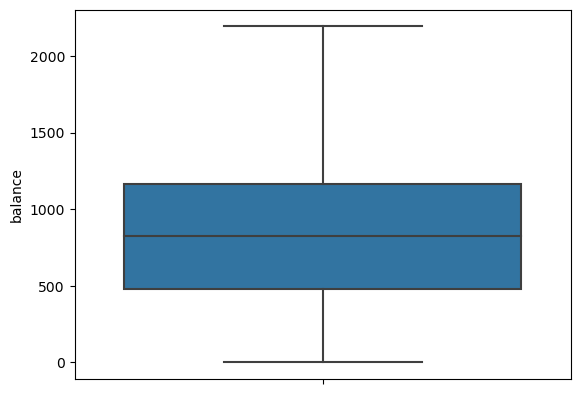

In [24]:
sns.boxplot(y= Default['balance'])
plt.show()

## Outliers have been replaced with capping / transformation method 

# Start of Credit Risk Modelling PD

### Transforming categorical variable into 1 & 0 using pandas get_dummies : One Hot Encoder method

In [25]:
# from sklearn import LabelEncoder

Default = pd.get_dummies(Default, drop_first=True)

# Getting top 10 Rows

In [26]:
Default.head(10)

,balance,income,default_Yes,student_Yes
0,729.53,44361.63,0,0
1,817.18,12106.13,0,1
2,1073.55,31767.14,0,0
3,529.25,35704.49,0,0
4,785.66,38463.50,0,0
5,919.59,7491.56,0,1
6,825.51,24905.23,0,0
7,808.67,17600.45,0,1
8,1161.06,37468.53,0,0
9,0.00,29275.27,0,0


### Relabeling the columns as per original names

In [27]:
Default.columns

Index(['balance', 'income', 'default_Yes', 'student_Yes'], dtype='object')

In [28]:
Default.columns = ['balance', 'income', 'default', 'student']

In [29]:
Default.head()

,balance,income,default,student
0,729.53,44361.63,0,0
1,817.18,12106.13,0,1
2,1073.55,31767.14,0,0
3,529.25,35704.49,0,0
4,785.66,38463.50,0,0


## Split the data into ind and dep variable

In [30]:
X = Default.drop('default', axis=1)
y = Default['default']

In [31]:
X.head()

,balance,income,student
0,729.53,44361.63,0
1,817.18,12106.13,1
2,1073.55,31767.14,0
3,529.25,35704.49,0
4,785.66,38463.50,0


In [32]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: default, dtype: uint8

In [33]:
y.value_counts()

0    9667
1     333
Name: default, dtype: int64

In [34]:
333/(333+9667)

0.0333

## Partitioning the data into train and test

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify =y)

In [36]:
print(X_train.shape)
print(X_test.shape)

(7000, 3)
(3000, 3)


# Why stratify = y ?

### please note, because this data is highly imbalanced and could possibly result into different proportions in the y variables between train and test set

In [37]:
print(y_train.value_counts(normalize=True).round(2))
print(' ')
print(y_test.value_counts(normalize=True).round(2))

0    0.97
1    0.03
Name: default, dtype: float64
 
0    0.97
1    0.03
Name: default, dtype: float64


# Treating target imbalance using SMOTE

In [38]:
#!pip install imblearn

In [39]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33, sampling_strategy=0.75)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [40]:
print(y.shape)
print(' ')
print(y_res.shape)

(10000,)
 
(11842,)


In [41]:
y.value_counts()

0    9667
1     333
Name: default, dtype: int64

In [42]:
y_res.value_counts()

0    6767
1    5075
Name: default, dtype: int64

In [43]:
Default_smote = pd.concat([X_res, y_res], axis=1)

In [45]:
# Balance dataset - smote 
Default_smote.groupby('default').mean()

,balance,income,student
default,,,
0,807.913022,33555.565605,0.288902
1,1748.067687,31074.712267,0.337537


In [46]:
# Original dataset - imbalance dataset
Default.groupby('default').mean()

,balance,income,student
default,,,
0,803.870400,33566.166610,0.291404
1,1736.593536,32089.146847,0.381381


# Model Building using Logistic Regression for "Probability at default"

### The equation of the Logistic Regression by which we predict the corresponding probabilities and then go on predict a discreate target variable is y = 1 / (1+e^-z)

In [ ]:
# from sklearn.linear_model import LogisticRegression 
#logit = LogisticRegression()
#logit.fit(X_train, y_train)

## Now, importing statsmodels modules

In [47]:
import statsmodels.formula.api as SM

In [ ]:
## Creating logistic regression equation and sorting it in F_1

### model = SM.logit(formula='Dep_Variable ~ Summation(Independet variable :k)', data = Data Frame containing the requried values).fit()

In [48]:
Default.columns

Index(['balance', 'income', 'default', 'student'], dtype='object')

In [49]:
# imbalance 
train = pd.concat([X_train, y_train], axis=1)
# balance 
train_smote = pd.concat([X_res, y_res], axis=1)
# validation data
test = pd.concat([X_test, y_test], axis=1)

In [52]:
print(train.shape)
print()
print(train_smote.shape)
print()
print(test.shape)

(7000, 4)

(11842, 4)

(3000, 4)


In [53]:
train_smote.head()

,balance,income,student,default
0,595.07,29842.89,0,0
1,290.68,37603.97,0,0
2,758.47,38018.15,0,0
3,500.65,31353.75,0,0
4,1391.41,30427.20,0,0


In [54]:
f_1 = 'default ~ balance + income + student'

# Fitting the logistic regression model on imbalance dataset

In [55]:
model1 = SM.logit(formula=f_1, data=train).fit()

Optimization terminated successfully.
         Current function value: 0.078006
         Iterations 10


In [56]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6996
Method:                           MLE   Df Model:                            3
Date:                Sun, 02 Jul 2023   Pseudo R-squ.:                  0.4657
Time:                        21:59:28   Log-Likelihood:                -546.04
converged:                       True   LL-Null:                       -1021.9
Covariance Type:            nonrobust   LLR p-value:                5.419e-206
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.4580      0.578    -18.080      0.000     -11.592      -9.324
balance        0.0059      0.000     20.744      0.000       0.005       0.006
income      -1.53e-05   9.98e-06     -1.534      0.125   -3.49e-05    4.25e-06
student       -1.0130      0.282     -3.592      0.000      -1.566      -0.460
==============================================================================

Possibly complete quasi-separation: A fraction 0.16 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Validating the model on train set

In [57]:
y_pred_train = np.where(model1.predict(train)>0.5,1,0)

In [58]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [59]:
confusion_matrix(y_train, y_pred_train)

array([[6737,   30],
       [ 158,   75]], dtype=int64)

In [60]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6767
           1       0.71      0.32      0.44       233

    accuracy                           0.97      7000
   macro avg       0.85      0.66      0.72      7000
weighted avg       0.97      0.97      0.97      7000



In [61]:
print(accuracy_score(y_train, y_pred_train))

0.9731428571428572


# Validating the model on test set

In [62]:
y_pred_test = np.where(model1.predict(test)>0.5,1,0)

In [63]:
confusion_matrix(y_test, y_pred_test)

array([[2888,   12],
       [  66,   34]], dtype=int64)

In [64]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2900
           1       0.74      0.34      0.47       100

    accuracy                           0.97      3000
   macro avg       0.86      0.67      0.73      3000
weighted avg       0.97      0.97      0.97      3000



In [71]:
print(accuracy_score(y_test, y_pred_test))

0.974


# Please note, ~ACCURACY is not a good measurement when we have imbalance dataset or probability values

# Model is not overfitting but the recall value is really poor. Basis recall, can we say it's high bias

# Fitting the logistic Regression model on Balanced data

In [65]:
model_2 = SM.logit(formula=f_1, data=train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.236659
         Iterations 8


In [66]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                11842
Model:                          Logit   Df Residuals:                    11838
Method:                           MLE   Df Model:                            3
Date:                Sun, 02 Jul 2023   Pseudo R-squ.:                  0.6535
Time:                        22:17:58   Log-Likelihood:                -2802.5
converged:                       True   LL-Null:                       -8087.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.6320      0.240    -35.967      0.000      -9.102      -8.162
balance        0.0072      0.000     51.698      0.000       0.007       0.007
income      -2.84e-05   4.09e-06     -6.935      0.000   -3.64e-05   -2.04e-05
student       -1.7174      0.120    -14.283      0.000      -1.953      -1.482
==============================================================================
"""

## Training dataset

In [67]:
y_pred_train_smote = np.where(model_2.predict(train_smote)>0.5,1,0)

In [68]:
confusion_matrix(y_res, y_pred_train_smote)

array([[6111,  656],
       [ 500, 4575]], dtype=int64)

In [69]:
print(classification_report(y_res, y_pred_train_smote))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      6767
           1       0.87      0.90      0.89      5075

    accuracy                           0.90     11842
   macro avg       0.90      0.90      0.90     11842
weighted avg       0.90      0.90      0.90     11842



In [70]:
print(accuracy_score(y_res, y_pred_train_smote))

0.9023813545009289


## Test dataset

In [72]:
y_pred_test_smote = np.where(model_2.predict(test)>0.5,1,0)

In [73]:
confusion_matrix(y_test, y_pred_test_smote)

array([[2634,  266],
       [  18,   82]], dtype=int64)

In [74]:
print(classification_report(y_test, y_pred_test_smote))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      2900
           1       0.24      0.82      0.37       100

    accuracy                           0.91      3000
   macro avg       0.61      0.86      0.66      3000
weighted avg       0.97      0.91      0.93      3000



In [75]:
print(accuracy_score(y_test, y_pred_test_smote))

0.9053333333333333


# Conclusion: 

#### we can see that we get better recall value after balancing the data. hence, we prefer to go with model_2

# END